
# **<center><font style="color:rgb(100,109,254)">Diabetes Prediction Using Deep Learning</font> </center>**

<center>
<img src='https://www.cdc.gov/diabetes/images/library/spotlights/diabetes-stats-report-724px.png?_=42420' with="100%"></center>

Dans ce mini projet, nous allons prédire si le patient est diabétique ou non sur la base des features que nous fournirons à notre modèle de deep learning



- **`Step 1:` Chargement et préparation des données**

    - **Téléchargement des données**

    - **Analyse exploratoire des données (EDA)** :  pour comprendre les tendances et les relations entre les variables.

    - **Visualisation des données** : pour mieux comprendre les distributions et les corrélations.

- **`Step 2:`  Préparation du modèle Deep learning**

    - **Préparation de l'ensemble de données avant création du modèle** : en divisant les données en ensembles d'entraînement et de test.
    
    - **Création du modèle Deep Learning**

- **`Step 3:`  Compilation du modèle** : en spécifiant la fonction de perte, l'optimiseur et les métriques à utiliser.

- **`Step 4:` Entrainemenet du modèle**

- **`Step 5:` Evaluation des performances du modèle** :  en utilisant les données de test et en comparant les prédictions avec les vraies valeurs.

- **`Step 6:` Utilisation du modèle préparé déjà et affichage de son diagramme à l’aide de la fonction plot_model**

- **`Step 7:` Compiler du modèle à nouveau en utilisant le paramètre validation_split**

- **`Step 8:`  Analyse visuelle à l’aide des fonctions de la bibliothèque MatPLotLib** : Utilisation de la bibliothèque Matplotlib pour faire des analyses visuelles des performances du modèle, telles que des graphiques de perte et de précision.

- **`Step 9:` La prédiction sur les données de test**

### **<font style="color:rgb(134,19,348)"> Importation des bibliothèques</font>**

Nous allons commencer par installer et importer les bibliothèques requises.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **<font style="color:rgb(134,19,348)">Step 1: Chargement et préparation des données</font>**

#### **<font style="color:rgb(134,19,348)"> => Téléchargement des données</font>**


Dans un premier temps, nous téléchargerons et visualiserons les données ainsi que les étiquettes pour avoir une idée de ce à quoi nous allons avoir affaire. Nous utiliserons l'ensemble de données provient à l'origine de l'Institut national du diabète et des maladies digestives et rénales. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est diabétique ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été placées sur la sélection de ces instances à partir d'une plus grande base de données.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
df_diabetes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data-diabetes.csv')

df_diabetes.head()

Mounted at /content/drive


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


#### **<font style="color:rgb(134,19,348)">=> Analyse exploratoire des données (EDA)</font>**

In [ ]:
# Afficher les colonnes disponibles dans notre dataset
df_diabetes.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [ ]:
# Définir des noms de colonnes
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Affecter les noms de colonnes à la DataFrame
df_diabetes.columns = col_names

In [ ]:
# Afficher les colonnes disponibles dans notre dataset
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# afficher des informations sur notre dataframe, 
# y compris le type d'index et les colonnes, les valeurs non nulles et l'utilisation de la mémoire.
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Afficher les statistiques descriptives de l'ensemble des données
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Savoir si notre ensemble de données contient des valeurs nulles ou non
df_diabetes.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
762,False,False,False,False,False,False,False,False,False
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False


In [ ]:
# le nombre de valeurs nulles de notre jeu de données.
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Ici, à partir du code ci-dessus, nous avons d'abord vérifié s'il y avait des valeurs nulles avec la fonction IsNull() , puis nous avons pris la somme de toutes ces valeurs manquantes de la fonction sum() et le résultat que nous obtenons maintenant est qu'il n'y a pas valeurs manquantes, mais ce n'est en fait pas une vraie car dans cet ensemble de données particulier, toutes les valeurs manquantes ont reçu le 0 comme valeur. Par conséquent, nous remplacerons d'abord la valeur 0 par la valeur NAN, puis nous recommencerons le processus.

In [ ]:
# Nous allons créer une copie des données et des indices de l'objet appelant.
# Les modifications apportées aux données ou aux indices de la copie ne seront pas reflétées dans l'objet d'origine 
df_diabetes_copy = df_diabetes.copy(deep = True) 

In [ ]:
# Nous choisissons seulement les colonnes qui peuvent avoir des valeurs nulles
# Nous remplaçons les valeurs 0 de ces colonnes choisis par des valeurs manquantes NAN
df_diabetes_copy[['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']] = df_diabetes_copy[['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)

df_diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [ ]:
# Afficher le nombre des valeurs NAN pour chaque colonne
print(df_diabetes_copy.isna().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#### **<font style="color:rgb(134,19,348)">=> Visualisation des données</font>**

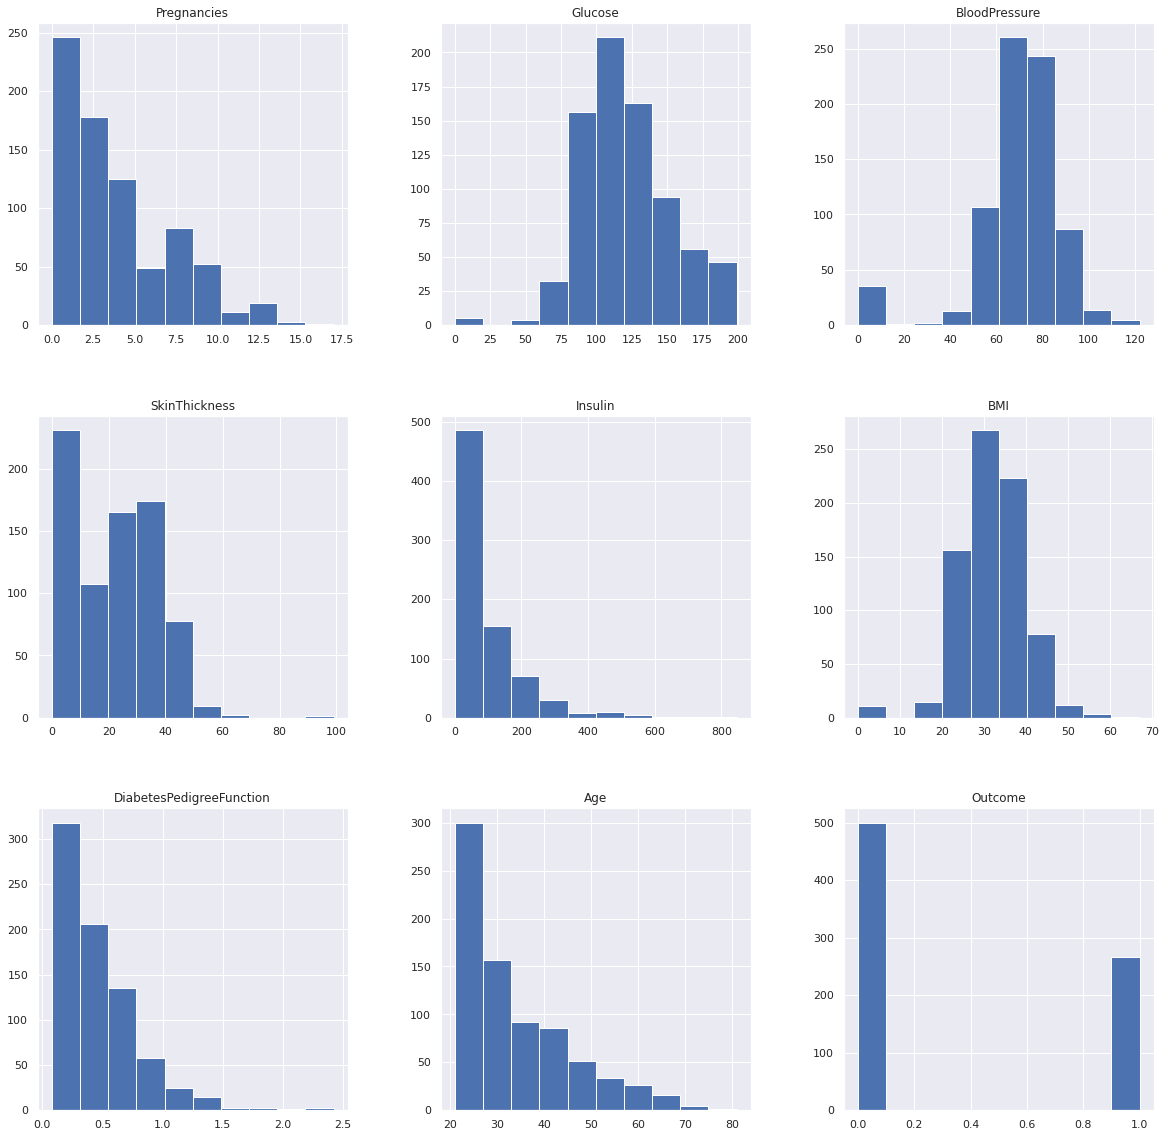

In [ ]:
# Tracer une représentation de la distribution des données. 
# Tracer un histogramme pour chaque série du DataFrame, ce qui donne un histogramme par colonne.
p = df_diabetes.hist(figsize = (20,20))

In [ ]:
# Remplacer les valeurs NAN de la colonne 'Glucose' par la valeur moyenne de cette colonne particulière
df_diabetes_copy['Glucose'].fillna(df_diabetes_copy['Glucose'].mean(), inplace = True) 

# Remplacer les valeurs NAN de la colonne 'BloodPressure' par la valeur moyenne de cette colonne particulière
df_diabetes_copy['BloodPressure'].fillna(df_diabetes_copy['BloodPressure'].mean(), inplace = True) 

# Remplacer les valeurs NAN de la colonne 'SkinThickness' par la valeur médianne de cette colonne particulière
df_diabetes_copy[ 'SkinThickness'].fillna(df_diabetes_copy['SkinThickness'].median(), inplace = True) 

# Remplacer les valeurs NAN de la colonne 'Insulin' par la valeur médianne de cette colonne particulière
df_diabetes_copy['Insulin'].fillna(df_diabetes_copy['Insulin'].median(), inplace = True) 

# Remplacer les valeurs NAN de la colonne 'BMI' par la valeur médianne de cette colonne particulière
df_diabetes_copy['BMI'].fillna(df_diabetes_copy['BMI'].median(), inplace = True)

Maintenant nous allons utiliser à nouveau le graphique hist pour voir la distribution de l'ensemble de données , mais cette fois, nous nous allons utiliser cette visualisation pour voir les changements que nous pouvons voir après la suppression de ces valeurs nulles de l'ensemble de données 

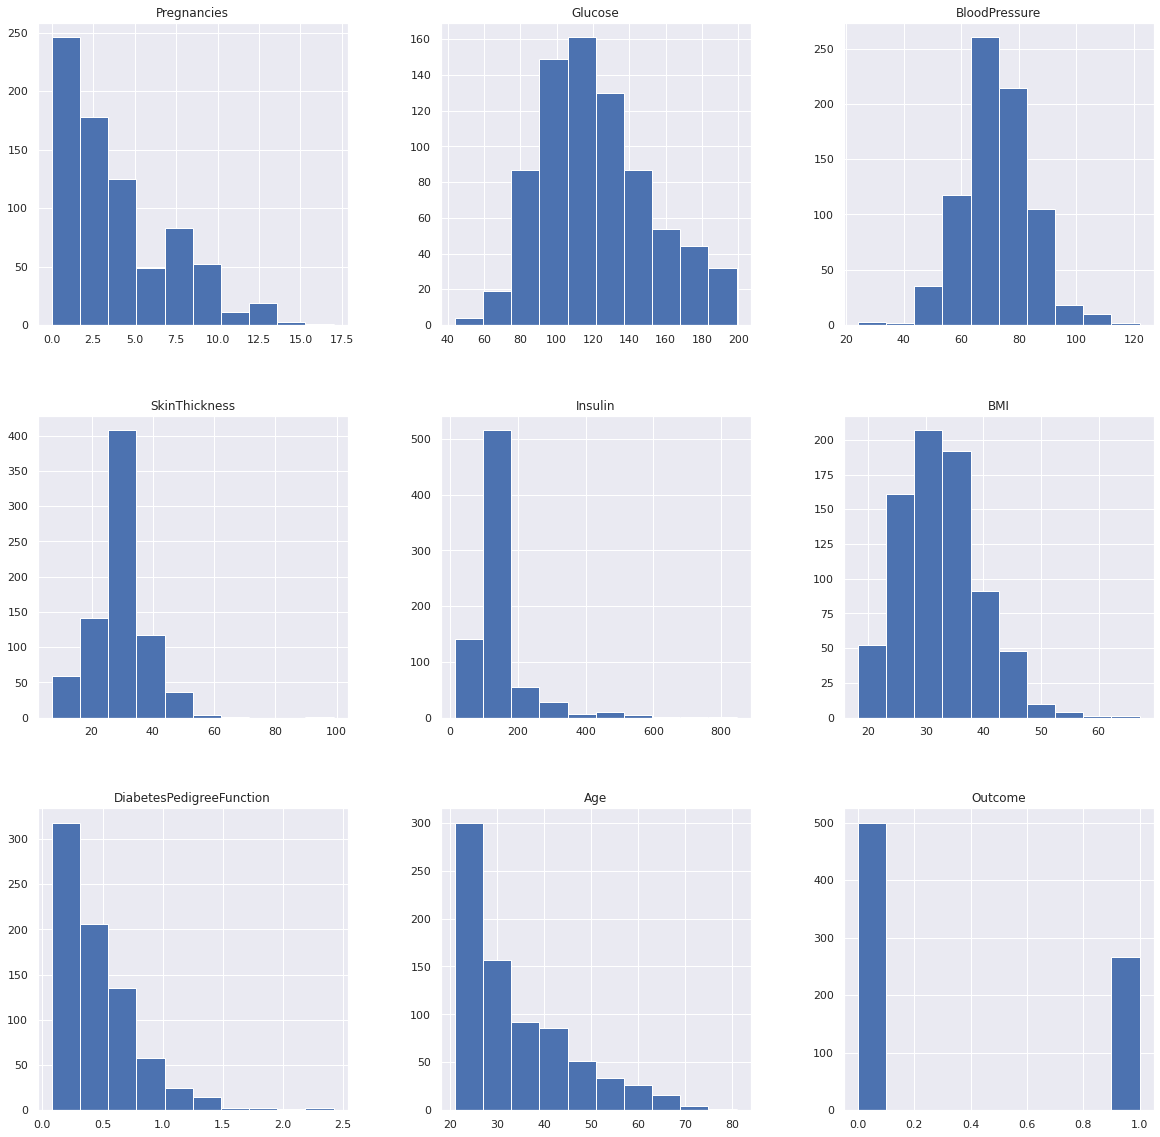

In [ ]:
# Tracer les distributions après avoir supprimé les valeurs NAN.
p = df_diabetes_copy.hist(figsize = (20,20))

Maintenant, vérifions à quel point notre colonne 'Outcome' est équilibrée

0    500
1    267
Name: Outcome, dtype: int64


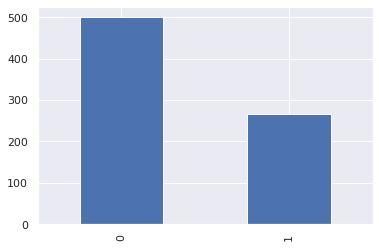

In [ ]:
# Renvoie une série contenant le nombre de lignes uniques de la colonne 'Outcome'
print(df_diabetes.Outcome.value_counts()) 

# Tracer un graphique à barres qui montre les comparaisons entre les valeurs uniques de la colonne 'Outcome' 
p = df_diabetes.Outcome.value_counts().plot(kind="bar")

Ici, à partir de la visualisation ci-dessus, il est clairement visible que notre ensemble de données est complètement déséquilibré en fait, le nombre de patients diabétiques est la moitié des patients non diabétiques.

###  **Corrélation entre toutes les features**

###  Avant nettoyage :

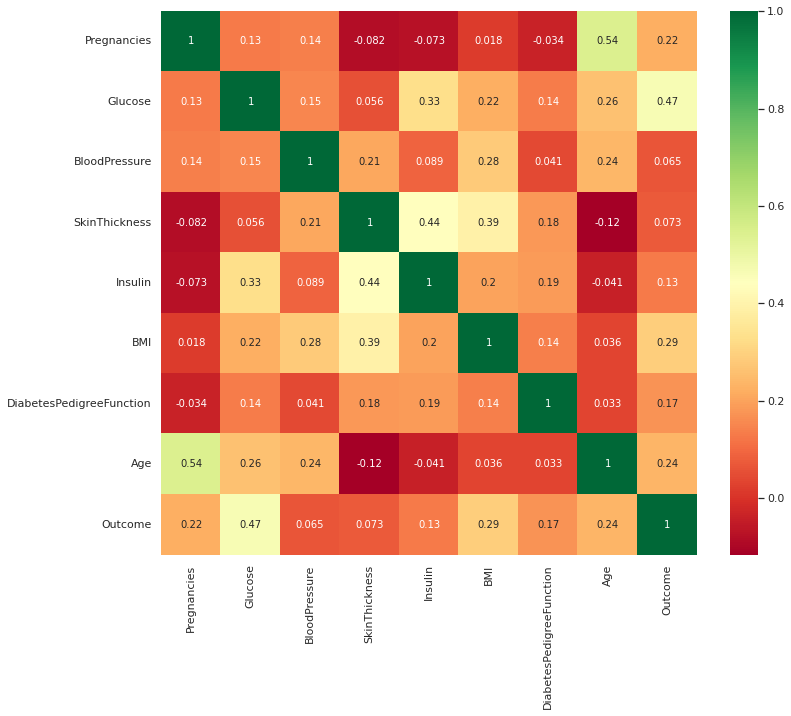

In [ ]:
# Régler la taille de la figure sur 12 par 10.
plt.figure(figsize=(12,10))

# seaborn a une méthode simple pour présenter heatmap
p = sns.heatmap(df_diabetes.corr(), annot=True,cmap ='RdYlGn')

###  Après nettoyage :

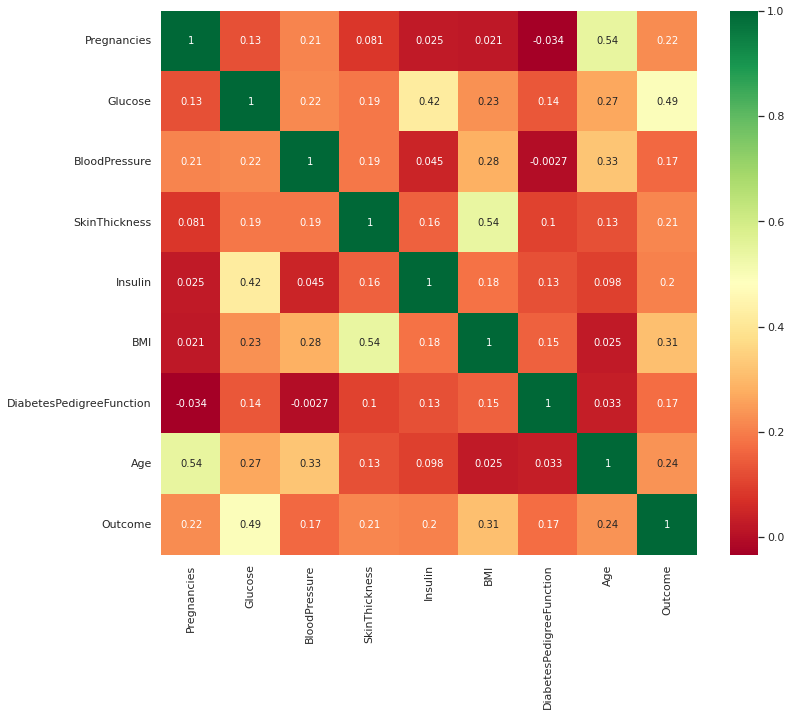

In [ ]:
# Régler la taille de la figure sur 12 par 10.
plt.figure(figsize=(12,10))

# seaborn a une méthode simple pour présenter heatmap
p = sns.heatmap(df_diabetes_copy.corr(), annot=True,cmap ='RdYlGn')

#### **<font style="color:rgb(134,19,348)">=> Préparation de l'ensemble de données </font>**

### Standardisation des données
Les données prétraitées peuvent contenir des attributs avec un mélange d'échelles pour diverses quantités.

De nombreuses méthodes d'apprentissage automatique attendent ou sont plus efficaces si les attributs de données ont la même échelle.

Deux méthodes de mise à l'échelle des données populaires sont la normalisation et la standardisation.

- La normalisation fait référence à la remise à l'échelle des attributs numériques à valeur réelle dans la plage 0 et 1.

- La standardisation fait référence au déplacement de la distribution de chaque attribut pour avoir une moyenne de zéro et un écart type de un (variance unitaire).

### Avant standardisation : 

In [ ]:
df_diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
1,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0


### Après standardisation : 

In [ ]:
standardScaler_X = StandardScaler()

df_after_standard_scaling_X =  pd.DataFrame(standardScaler_X.fit_transform(df_diabetes_copy.drop(["Outcome",  'BloodPressure', 'SkinThickness'],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

df_after_standard_scaling_X.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.843726,-1.204829,-0.181663,-0.851443,-0.364265,-0.188940
1,1.234240,2.016619,-0.181663,-1.331439,0.604701,-0.103795
2,-0.843726,-1.073342,-0.540538,-0.633263,-0.919684,-1.040393
3,-1.140579,0.504511,0.316130,1.548539,5.482732,-0.018650
4,0.343683,-0.185800,-0.181663,-0.996897,-0.817052,-0.274086


nous pouvons voir que chaque valeur est maintenant sur la même échelle, ce qui aidera notre modèle ML à donner un meilleur résultat.

In [ ]:
# Target 
Y = df_diabetes_copy['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

# # Diviser les données en (67 %) d'entrainement et (33 %) de test 
X_train, X_test, y_train, y_test = train_test_split(df_after_standard_scaling_X, Y, test_size=0.33, random_state=7)

## **<font style="color:rgb(134,19,348)">Step 2: Préparation du modèle Deep Learning</font>** 

In [ ]:
# Importation de la bibliothèque Keras pour la construction de modèles de Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Création du modèle Deep Learning
model_withoutValidation = Sequential()
model_withoutValidation.add(Dense(20, input_dim=6, activation='relu'))
model_withoutValidation.add(Dense(20, activation='relu'))
model_withoutValidation.add(Dense(20, activation='relu'))
model_withoutValidation.add(Dense(1, activation='sigmoid'))

## **<font style="color:rgb(134,19,348)">Step 3: Compilation du modèle Deep Learning</font>** 

La compilation d'un modèle de réseau de neurones en Keras est le processus de préparation du modèle pour l'entraînement. La compilation comprend la définition de plusieurs paramètres importants, notamment :

* La fonction de coût ou la perte, qui mesure l'erreur du modèle par rapport aux vraies sorties. Il existe plusieurs fonctions de coût couramment utilisées, telles que la somme des erreurs quadratiques (MSE), la log vraisemblance croisée (binary_crossentropy pour la classification binaire et categorical_crossentropy pour la classification multiclasse), etc.

* L'optimiseur, qui définit la stratégie d'optimisation pour réduire la fonction de coût pendant l'entraînement. Il existe plusieurs optimiseurs couramment utilisés, tels que Stochastic Gradient Descent (SGD), Adagrad, Adam, etc.

* Les métriques, qui sont utilisées pour évaluer les performances du modèle. Certaines métriques couramment utilisées sont Accuracy, Precision ,Recall (or) sensitivity ,Specificity,F1-Score
, etc.

In [ ]:
model_withoutValidation.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## **<font style="color:rgb(134,19,348)">Step 4: Entrainement du modèle Deep Learning</font>** 

L'entraînement du modèle consiste à adapter les poids du modèle à l'ensemble de données d'entraînement. Cela se fait en utilisant une fonction de coût et en minimisant cette fonction en utilisant un algorithme d'optimisation tel que Gradient Descent. L'objectif est de minimiser la différence entre les prédictions du modèle et les valeurs réelles pour l'ensemble de données d'entraînement. Après l'entraînement, le modèle peut faire des prédictions sur des données non vues.

Pour entraîner un modèle en utilisant Keras, on utilise la méthode "fit" de l'objet modèle. Cela prend en entrée l'ensemble de données d'entraînement et les étiquettes cibles associées, ainsi que le nombre d'époques (iterations) et le batch size (nombre d'exemples utilisés pour mettre à jour les poids du modèle à chaque fois).

In [ ]:
history_without_validationSplit = model_withoutValidation.fit(X_train, y_train,  epochs=50, batch_size=64)

Epoch 1/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4048 - accuracy: 0.7992
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4038 - accuracy: 0.7992
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4030 - accuracy: 0.7973
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8012
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4022 - accuracy: 0.8012
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.4022 - accuracy: 0.8031
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.4015 - accuracy: 0.7992
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.7973
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.7953
Epoch 10/50
9/9 [==============================] - 0s 5ms/step - loss: 0.3986 - accuracy: 0.7934
Epoch 11/50
9/9 [======================

## **<font style="color:rgb(134,19,348)"> Step 5: Evaluation des performances du modèle : </font>**
L'étape 5 de la création d'un modèle de prédiction de diabète consiste à évaluer les performances du modèle entraîné. Cela permet de mesurer la qualité de la prédiction du modèle en utilisant différentes métriques.

Il existe plusieurs métriques couramment utilisées pour évaluer les performances d'un modèle de classification binaire, telles que l'accuracy, la matrice de confusion, le rapport de vrais positifs (TPR), le rapport de faux positifs (FPR), la précision, le rappel, le F1 score et l'AUC (Area Under the Curve) du courbe ROC (Receiver Operating Characteristic).

En utilisant Keras, on peut évaluer les performances du modèle en utilisant la méthode "evaluate" de l'objet modèle. Cela prend en entrée l'ensemble de données de test et les étiquettes cibles associées. La méthode "evaluate" retourne une liste de valeurs pour les métriques définies dans la compile step.

In [ ]:
# Évaluation des performances du modèle
model_withoutValidation.evaluate(X_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.7480


[0.44534406065940857, 0.748031497001648]

La méthode evaluate permet d'évaluer les performances du modèle entraîné en utilisant les données de test (X_test et y_test). Cette méthode retourne deux valeurs: test_loss et test_acc. La valeur de test_loss représente la perte (loss) du modèle sur les données de test, qui reflète la différence entre les prédictions du modèle et les valeurs réelles de y_test. La valeur de test_acc représente la précision (accuracy) du modèle sur les données de test, qui indique le pourcentage de prédictions correctes.

Dans ce cas précis, test_acc est de 0.6535, ce qui signifie que le modèle a correctement prédit 65,35% des valeurs de y_test. De même, test_loss est de 0.6996, ce qui signifie que le modèle a fait une erreur de 0.6996 en moyenne pour chaque prédiction sur les données de test.

Il est important de noter que ces résultats dépendent des données d'entraînement, des hyperparamètres choisis, et de l'architecture du modèle. Il peut donc être nécessaire de les ajuster pour obtenir de meilleurs résultats.


## **<font style="color:rgb(134,19,348)"> Step 6: Utilisation du modèle pour faire des prédictions sur des données supplémentaires </font>**

In [ ]:
def predictions(model):
  # Utilisation du modèle pour faire des prédictions sur des données supplémentaires
  predictions = model.predict(X_test)
  y_pred = np.where(predictions > 0.5 , 1, 0)
  from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

  print(accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  confusion_matrix = confusion_matrix(y_test,y_pred)

  p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

8/8 [==============================] - 0s 2ms/step
0.7874015748031497
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       169
           1       0.71      0.62      0.66        85

    accuracy                           0.79       254
   macro avg       0.76      0.75      0.75       254
weighted avg       0.78      0.79      0.78       254



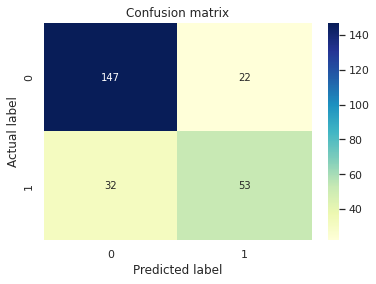

In [ ]:
predictions(model_withoutValidation)

 ## **<font style="color:rgb(134,19,348)"> Step 7: Compilation du modèle à nouveau en utilisant le paramètre validation_split</font>**

Le paramètre validation_split dans fit est utilisé pour définir la proportion des données d'entraînement à utiliser comme ensemble de validation. Il s'agit d'une approche d'évaluation de la performance du modèle qui consiste à séparer les données d'entraînement en deux parties: une partie pour l'entraînement (généralement 66%) et une partie pour la validation (généralement 33%). Le modèle est entraîné sur la partie d'entraînement et est évalué sur la partie de validation. Cela permet de mesurer la performance du modèle sur des données qu'il n'a pas vues pendant l'entraînement. Les résultats peuvent être utilisés pour déterminer si le modèle généralise bien aux données nouvelles et pour éviter le surapprentissage. La valeur du paramètre validation_split est un nombre compris entre 0 et 1 qui représente la proportion des données d'entraînement à utiliser pour la validation.

In [ ]:
import keras
# Création du modèle Deep Learning
model_withValidation = Sequential()
model_withValidation.add(Dense(30, input_dim=6, activation='relu'))
model_withValidation.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model_withValidation.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

# Entraînement du modèle
history_with_validationSplit = model_withValidation.fit(X_train, y_train, validation_split=0.33, epochs=11, batch_size=32)

Epoch 1/11
11/11 [==============================] - 1s 30ms/step - loss: 0.6331 - accuracy: 0.6268 - val_loss: 0.5052 - val_accuracy: 0.7412
Epoch 2/11
11/11 [==============================] - 0s 16ms/step - loss: 0.5014 - accuracy: 0.7376 - val_loss: 0.4638 - val_accuracy: 0.8000
Epoch 3/11
11/11 [==============================] - 0s 12ms/step - loss: 0.4786 - accuracy: 0.7580 - val_loss: 0.4599 - val_accuracy: 0.7882
Epoch 4/11
11/11 [==============================] - 0s 11ms/step - loss: 0.4644 - accuracy: 0.7522 - val_loss: 0.4659 - val_accuracy: 0.7765
Epoch 5/11
11/11 [==============================] - 0s 8ms/step - loss: 0.4567 - accuracy: 0.7493 - val_loss: 0.4775 - val_accuracy: 0.7647
Epoch 6/11
11/11 [==============================] - 0s 7ms/step - loss: 0.4507 - accuracy: 0.7580 - val_loss: 0.4704 - val_accuracy: 0.7765
Epoch 7/11
11/11 [==============================] - 0s 16ms/step - loss: 0.4453 - accuracy: 0.7551 - val_loss: 0.4782 - val_accuracy: 0.7588
Epoch 8/11
11/1

In [ ]:
# Évaluation des performances du modèle
model_withValidation.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8031


[0.424348920583725, 0.8031495809555054]

8/8 [==============================] - 0s 2ms/step
0.8031496062992126
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       169
           1       0.69      0.75      0.72        85

    accuracy                           0.80       254
   macro avg       0.78      0.79      0.78       254
weighted avg       0.81      0.80      0.81       254



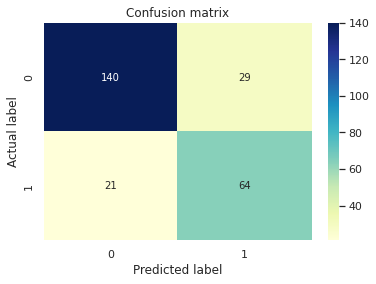

In [ ]:
# Utilisation du modèle pour faire des prédictions sur des données supplémentaires
predictions(model_withValidation)

## **<font style="color:rgb(134,19,348)"> Step 8: Analyse visuelle à l’aide de la bibliothèque MatPLotLib</font>**


In [ ]:
print("------ Accuracy ---------")
print("Without validation ",np.argmax( history_without_validationSplit.history["accuracy"]))
print("With validation ",np.argmax( history_with_validationSplit.history["val_accuracy"]))

print("\n\n------ Loss ---------")
print("Without validation ",np.argmin( history_without_validationSplit.history["loss"]))
print("With validation ",np.argmin( history_with_validationSplit.history["val_loss"]))

print("\n\nMEan  ", int(np.mean([15,23,13,12])))

------ Accuracy ---------
Without validation  37
With validation  1


------ Loss ---------
Without validation  49
With validation  2


MEan   15


##*=> Sans le parametre validation_split*

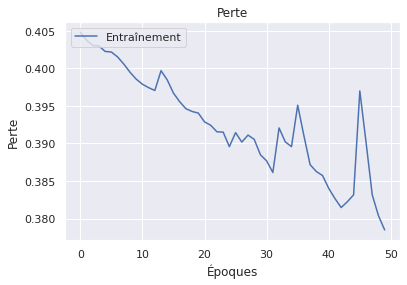

In [ ]:
# Analyse visuelle de la perte d'entraînement et de validation

plt.plot(history_without_validationSplit.history["loss"])
plt.title("Perte")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend(["Entraînement"], loc="upper left")
plt.show()

##*=> Avec le parametre validation_split*

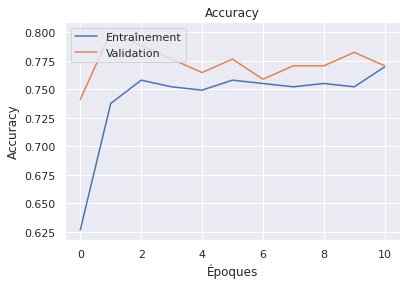

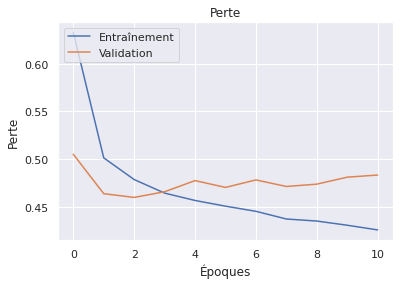

In [ ]:
# Analyse visuelle de l'accuracy et de la perte d'entraînement et de validation
plt.plot(history_with_validationSplit.history["accuracy"])
plt.plot(history_with_validationSplit.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Époques")
plt.ylabel("Accuracy")
plt.legend(["Entraînement", "Validation"], loc="upper left")
plt.show()

plt.plot(history_with_validationSplit.history["loss"])
plt.plot(history_with_validationSplit.history["val_loss"])
plt.title("Perte")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend(["Entraînement", "Validation"], loc="upper left")
plt.show()

# Savegarde du modèle


In [ ]:
model_withValidation.save("model.h5")

### Remarque ✅
Si on n'utilise pas la validation_split lors de l'entraînement du modèle avec Keras, on ne sera pas en mesure de mesurer la performance du modèle sur un ensemble de données indépendant pendant l'entraînement. Cela peut entraîner une surestimation de la performance du modèle sur les données d'entraînement, ce qui est souvent appelé surapprentissage. Cela peut se manifester par une diminution de la perte sur les données d'entraînement au fil des époques. Cela signifie que le modèle commence à mémoriser les données d'entraînement au lieu de généraliser les relations à des données nouvelles. Il est donc important d'utiliser validation_split pour évaluer la performance du modèle sur des données indépendantes pendant l'entraînement.

# Résumé ⭐
Dans ce projet, l'objectif est de prédire la présence de diabète chez une personne en utilisant l'apprentissage profond avec Keras. Les étapes clés pour atteindre cet objectif sont les suivantes:

- **Préparation des données:** Il s'agit de collecter les données nécessaires pour le modèle et de les préparer pour l'entraînement et les tests en utilisant des techniques telles que le codage et la normalisation des données.

- **Définition du modèle:** Il s'agit de choisir un modèle de réseau de neurones et de le définir en utilisant les couches appropriées pour la tâche de classification.

- **Compilation du modèle:** Il s'agit de définir les hyperparamètres du modèle tels que la fonction de coût, l'optimiseur et les métriques d'évaluation.

- **Entraînement du modèle:** Il s'agit d'entraîner le modèle en utilisant les données d'entraînement en répétant plusieurs epochs.

- **Évaluation du modèle:** Il s'agit de mesurer la performance du modèle en utilisant des métriques telles que l'accuracy et la loss.

- **Utilisation du modèle préparé et affichage du diagramme:** Il s'agit d'utiliser le modèle entraîné pour effectuer des prédictions sur les données de test et de visualiser les résultats en utilisant des diagrammes.

- **Optimisation du modèle:** Si les résultats ne sont pas satisfaisants, il peut être nécessaire d'optimiser le modèle en modifiant les hyperparamètres, en ajoutant ou en supprimant des couches, etc.

En fin de compte, l'évaluation des résultats déterminera la qualité du modèle pour prédire la présence de diabète.

#*================================================================================================================================================*

# Optimisation des hyper paramètres 
Les modèles de régression (ou de classification) sont des fonctions mathématiques qui dépendent d’hyperparamètres . Le réglage de ces hyperparamètres va impacter fortement le score final de ce modèle.

GridSearchCV permet réaliser automatiquement la recherche des meilleurs hyperparamètres. L’utilisateur aura juste à préciser quels hyperparamètres il souhaite faire varier leurs niveaux de variation et GridSearchCV déterminera automatiquement le meilleur réglage.

Le résultat final affiche le meilleur score obtenu ainsi que les meilleurs paramètres qui l'ont produit, puis les moyennes et les écarts-types pour chaque combinaison de paramètres. Le code affiche également l'index de la moyenne la plus élevée parmi les moyennes des scores.

La moyenne (mean en anglais) et l'écart-type (standard deviation en anglais) sont deux des mesures les plus courantes pour décrire la distribution d'un ensemble de données.

La moyenne est simplement la somme de toutes les valeurs dans l'ensemble divisée par le nombre total de valeurs. Elle donne une idée de la tendance générale des données et peut être utilisée pour évaluer la performance moyenne d'un modèle.

L'écart-type mesure la variation des données autour de la moyenne. Plus l'écart-type est élevé, plus les valeurs dans l'ensemble sont dispersées. Inversement, plus l'écart-type est faible, plus les valeurs dans l'ensemble sont proches de la moyenne. L'écart-type peut être utilisé pour évaluer la robustesse d'un modèle et pour déterminer si les résultats obtenus sont stables et fiables.

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(num_hidden_layers=1, num_neurons=10, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=8, activation=activation))
    for i in range(num_hidden_layers-1):
        model.add(Dense(num_neurons, activation=activation))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

param_grid = {
    'num_hidden_layers': [1, 2, 3],
    'num_neurons': [10, 20, 30],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print(means.argmax)

Best: 0.775828 using {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'num_hidden_layers': 1, 'num_neurons': 30, 'optimizer': 'adam'}
0.676413 (0.062317) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'num_hidden_layers': 1, 'num_neurons': 10, 'optimizer': 'adam'}
0.674464 (0.048772) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'num_hidden_layers': 1, 'num_neurons': 10, 'optimizer': 'rmsprop'}
0.740741 (0.045130) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'num_hidden_layers': 1, 'num_neurons': 20, 'optimizer': 'adam'}
0.723197 (0.021531) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'num_hidden_layers': 1, 'num_neurons': 20, 'optimizer': 'rmsprop'}
0.730994 (0.047027) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'num_hidden_layers': 1, 'num_neurons': 30, 'optimizer': 'adam'}
0.744639 (0.035196) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'num_hidden_layers': 1, 'num_neurons': 30, 'opti

In [ ]:
grid_result.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_batch_size', 'param_epochs', 'param_num_hidden_layers', 'param_num_neurons', 'param_optimizer', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
print("Les meilleurs parametres : ", grid_result.best_params_)

Les meilleurs parametres :  {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'num_hidden_layers': 1, 'num_neurons': 30, 'optimizer': 'adam'}


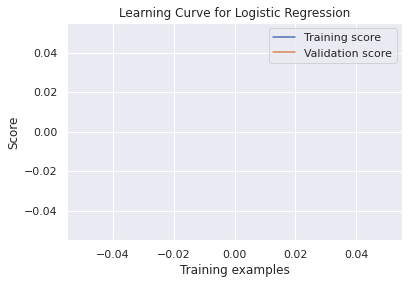

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, validation_scores = learning_curve( grid_result, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.2, 1, 5))

# Plot the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(validation_scores, axis=1), label="Validation score")
plt.legend()
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Logistic Regression")
plt.show()
